In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

def psi(x):
    #ar = np.zeros(x.shape[0])
    #for i in range(x.shape[0]):
        #print(tf.where(x[i][0] > 1 or x[i][0] < -1, 0.0, 1.0))
        #ar[i] = tf.where(x[i][0] > 1 or x[i][0] < -1, 0.0, 1.0)
    #return tf.convert_to_tensor(ar)
    return tf.where(x > 1 or x < -1, 0.0, 1.0)

def indicatrice(a,b):
    return lambda x: psi((2*x-b-a)/(b-a))

npart = 2
arr = np.linspace(-1, 1, npart + 1)

nn_indicatrici = [indicatrice(arr[i], arr[i+1]) for i in range(npart)]


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, nn_indicatrici, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])#, loss_weights=wei)

losshistory, train_state = model.train(iterations=1)

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.001717 s

Training model...

(20, 1)
(20, 1)
Tensor("partioned_random_fnn/Const:0", shape=(20, 1), dtype=float32)


c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Tensor("partioned_random_fnn/Const:0", shape=(20, 1), dtype=float32)
(102, 1)
(102, 1)
Tensor("partioned_random_fnn/Const:0", shape=(102, 1), dtype=float32)
Step      Train loss              Test loss               Test metric   
0         [1.69e+03, 3.49e+00]    [1.84e+03, 3.49e+00]    [2.61e+00]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
1         [1.66e+03, 3.47e+00]    [1.82e+03, 3.47e+00]    [2.60e+00]    

Best model at step 1:
  train loss: 1.67e+03
  test loss: 1.82e+03
  test metric: [2.60e+00]

'train' took 2.410339 s



In [4]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M =10
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
#wei = np.ones(2)
#wei[0] = 0
#wei = tf.convert_to_tensor(wei, dtype=tf.float32)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=1)


Compiling model...
'compile' took 0.000617 s

Training model...

(20, 1)
(20, 1)
Tensor("inputs:0", shape=(20, 1), dtype=float32)
Tensor("random_fnn_2/dense_4/Sin:0", shape=(20, 10), dtype=float32)
Tensor("random_fnn_2/dense_5/BiasAdd:0", shape=(20, 1), dtype=float32)
Tensor("inputs:0", shape=(20, 1), dtype=float32)
Tensor("random_fnn_2/dense_4/Sin:0", shape=(20, 10), dtype=float32)
Tensor("random_fnn_2/dense_5/BiasAdd:0", shape=(20, 1), dtype=float32)


c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


(102, 1)
(102, 1)
Tensor("inputs:0", shape=(102, 1), dtype=float32)
Tensor("random_fnn_2/dense_4/Sin:0", shape=(102, 10), dtype=float32)
Tensor("random_fnn_2/dense_5/BiasAdd:0", shape=(102, 1), dtype=float32)
Step      Train loss              Test loss               Test metric   
0         [8.62e+02, 5.50e-01]    [9.29e+02, 5.50e-01]    [1.08e+00]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
1000      [7.44e+00, 1.00e-02]    [6.03e+00, 1.00e-02]    [7.18e-02]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
2000      [9.89e-02, 1.47e-01]    [9.67e-02, 1.47e-01]    [3.15e-01]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
3000      [6.81e-02, 4.29e-02]    [6.06e-02, 4.29e-02]    [1.71e-01]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
4000      [5.06e-02, 3.32e-03]    [4.23e-02, 3.32e-03]    [4.77e-02]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
5000      [4.16e-02, 3.17e-04]    [3.33e-02, 3.17e-04]    [1.44e-02]    
(20, 1)
(20, 1)
(102, 1)
(102, 1)
6000      [3.67e-02, 1.20e-03]    [2.90e-02, 1.20e-03]    [2.82e-02]    
(20

In [3]:
x = tf.convert_to_tensor(np.ones((20, 10)))
y = tf.convert_to_tensor(np.ones((20, 1)))

print(tf.math.multiply(y, x))

tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(20, 10), dtype=float64)


In [34]:
geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

def psi_2(x):
    arr = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] < -1 or x[i] > 1:
            arr[i] = 0
    return arr

def indicatrice_2(a,b):
    return lambda x: psi_2((2*x-b-a)/(b-a))

npart = 2
arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici_2 = [indicatrice_2(arr[i], arr[i+1]) for i in range(npart)]

train_indicatrici = [nn_indicatrici_2[i](data.train_x) for i in range(npart)]
test_indicatrici = [nn_indicatrici_2[i](data.test_x) for i in range(npart)]

In [16]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

pi = np.pi

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - (np.pi) ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 26, 2, solution=func, num_test=5000)

@tf.function
def psi(x):
    return tf.where(x>1 or x<-1,)

def psi_2(x):
    arr = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] < -1 or x[i] > 1:
            arr[i] = 0
    return arr

def psi_3(x):
    arr = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= -5/4 and x[i] <= -3/4:
            arr[i] = (1 + np.sin(2*pi*x[i]))/2
        elif x[i] >= 3/4 and x[i] <= 5/4:
            arr[i] = (1 - np.sin(2*pi*x[i]))/2
    
    return arr

def indicatrice_2(a,b):
    return lambda x: psi_3((2*x-b-a)/(b-a))
    #return lambda x: psi_3(3*(x/2 - a - b)/(b - a))

npart = 3
arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici_2 = [indicatrice_2(arr[i], arr[i+1]) for i in range(npart)]

train_indicatrici = [nn_indicatrici_2[i](data.train_x) for i in range(npart)]
test_indicatrici = [nn_indicatrici_2[i](data.test_x) for i in range(npart)]

M = 100
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, train_indicatrici, test_indicatrici, Rm=10, b=20)

model = dde.Model(data, net)

model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=5)

losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

TypeError: __init__() missing 1 required positional argument: 'test_indicatrici'

Compiling model...
'compile' took 0.000536 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [1.29e+03, 2.89e-01]    [1.28e+03, 2.89e-01]    [2.04e+00]    
31        [1.43e-05, 1.14e-09]    [3.37e-05, 1.14e-09]    [1.56e-01]    

Best model at step 31:
  train loss: 1.43e-05
  test loss: 3.37e-05
  test metric: [1.56e-01]

'train' took 5.944702 s

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


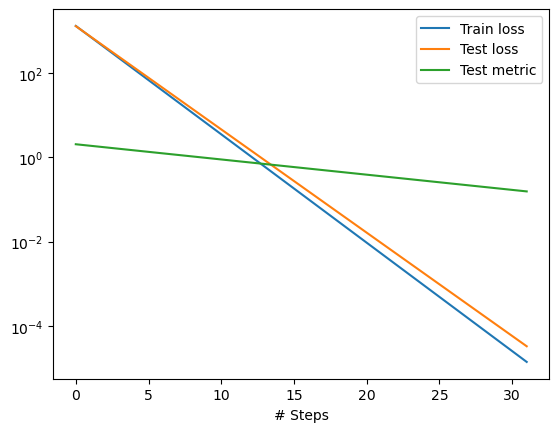

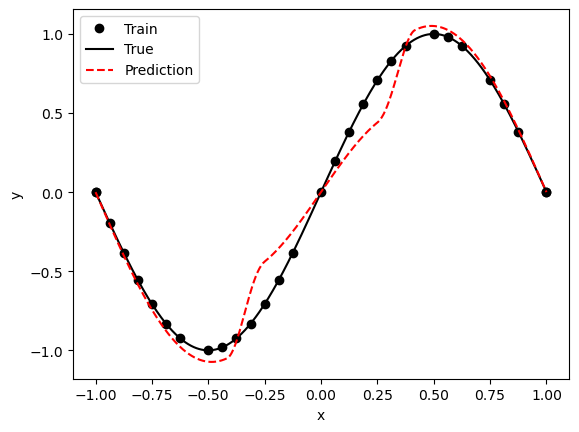

In [6]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
from numba import njit, prange

pi = np.pi
npart = 3

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - (np.pi) ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary, npart=1)
data = dde.data.PDE(geom, pde, bc, 26, 2, solution=func, num_test=500)

#@tf.function
def psi(x):
    y = np.zeros(x.shape, dtype='float32')
    for i in range(x.shape[0]):
        y[i] = tf.where(x[i] > 1 or x[i] < -1, 0.0, 1.0)
    return y

def psi_b(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= -5/4 and x[i] <= -3/4:
            arr[i] = (1 + np.sin(2*pi*x[i]))/2
        elif x[i] >= 3/4 and x[i] <= 5/4:
            arr[i] = (1 - np.sin(2*pi*x[i]))/2
    
    return arr

def psi_a(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= 3/4 and x[i] <= 5/4:
            arr[i] = (1 - np.sin(2*pi*x[i]))/2
    return arr

def psi_c(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= -5/4 and x[i] <= -3/4:
            arr[i] = (1 + np.sin(2*pi*x[i]))/2
        
    return arr

def indicatrice_a(a,b):
    return lambda x: psi_a((2*x-b-a)/(b-a))

def indicatrice_b(a,b):
    return lambda x: psi_b((2*x-b-a)/(b-a))

def indicatrice_c(a,b):
    return lambda x: psi_c((2*x-b-a)/(b-a))


arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici = [indicatrice_b(arr[i], arr[i+1]) for i in range(1,npart-1)]
nn_indicatrici.append(indicatrice_c(arr[-2], arr[-1]))
nn_indicatrici.insert(0, indicatrice_a(arr[0], arr[1]))

train_indicatrici = [nn_indicatrici[i](data.train_x) for i in range(npart)]
test_indicatrici = [nn_indicatrici[i](data.test_x) for i in range(npart)]

M = 50
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.partioned_random_FNN(layer_size, activation, initializer, npart, nn_indicatrici, train_indicatrici, test_indicatrici, Rm=10, b=0.1)

model = dde.Model(data, net)

model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)   # L-BFGS

losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [28]:
def psi_3(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= -5/4 and x[i] <= -3/4:
            arr[i] = (1 + np.sin(2*pi*x[i]))/2
        elif x[i] >= 3/4 and x[i] <= 5/4:
            arr[i] = (1 - np.sin(2*pi*x[i]))/2
    
    return arr

def indicatrice(a,b):
    return lambda x: psi_3((2*x-b-a)/(b-a))

npart = 4
arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici = [indicatrice(arr[i], arr[i+1]) for i in range(npart)]

length = 28
x = np.linspace(-1, 1, length)
somma = np.zeros(length)
indicatrici = [nn_indicatrici[i](x) for i in range(npart)]

for i in range(length):
    for j in range(npart):
        somma[i] += indicatrici[j][i]

print(somma)


[0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5]


In [33]:
def psi_b(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= -5/4 and x[i] <= -3/4:
            arr[i] = (1 + np.sin(2*pi*x[i]))/2
        elif x[i] >= 3/4 and x[i] <= 5/4:
            arr[i] = (1 - np.sin(2*pi*x[i]))/2
    
    return arr

def psi_a(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= 3/4 and x[i] <= 5/4:
            arr[i] = (1 - np.sin(2*pi*x[i]))/2
    return arr

def psi_c(x):
    arr = np.ones((x.shape[0],1), dtype='float32')
    for i in range(x.shape[0]):
        if x[i] < -5/4 or x[i] > 5/4:
            arr[i] = 0
        elif x[i] >= -5/4 and x[i] <= -3/4:
            arr[i] = (1 + np.sin(2*pi*x[i]))/2
        
    return arr

def indicatrice_a(a,b):
    return lambda x: psi_a((2*x-b-a)/(b-a))

def indicatrice_b(a,b):
    return lambda x: psi_b((2*x-b-a)/(b-a))

def indicatrice_c(a,b):
    return lambda x: psi_c((2*x-b-a)/(b-a))

npart = 4
arr = np.linspace(-1, 1, npart + 1)
nn_indicatrici = [indicatrice_b(arr[i], arr[i+1]) for i in range(1,npart-1)]
nn_indicatrici.append(indicatrice_c(arr[-2], arr[-1]))
nn_indicatrici.insert(0, indicatrice_a(arr[0], arr[1]))

length = 128
x = np.linspace(-1, 1, length)
somma = np.zeros(length)
indicatrici = [nn_indicatrici[i](x) for i in range(npart)]

for i in range(length):
    for j in range(npart):
        somma[i] += indicatrici[j][i]

print(somma)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
